C:\Users\janan\AppData\Local\Temp\ipykernel_21224\3254433756.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_gst = pd.read_sql(query, conn)


Total GST Collected by Product Category:
  Product_Category    Total_GST
0          Apparel  300514.1832
1       Home Decor  264483.0162
2           Beauty  259387.7472
3           Sports  181010.3184
4      Electronics   79717.3935


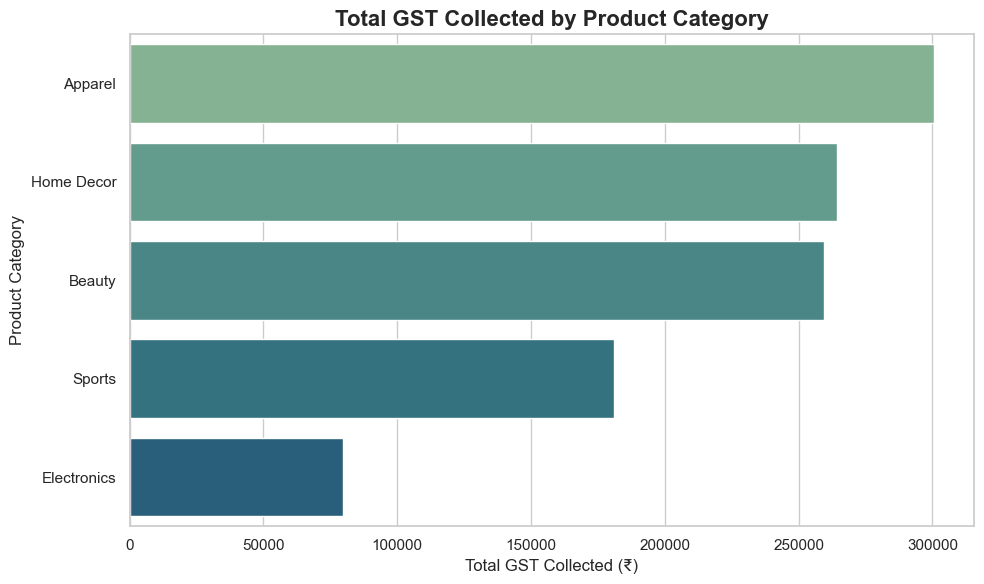

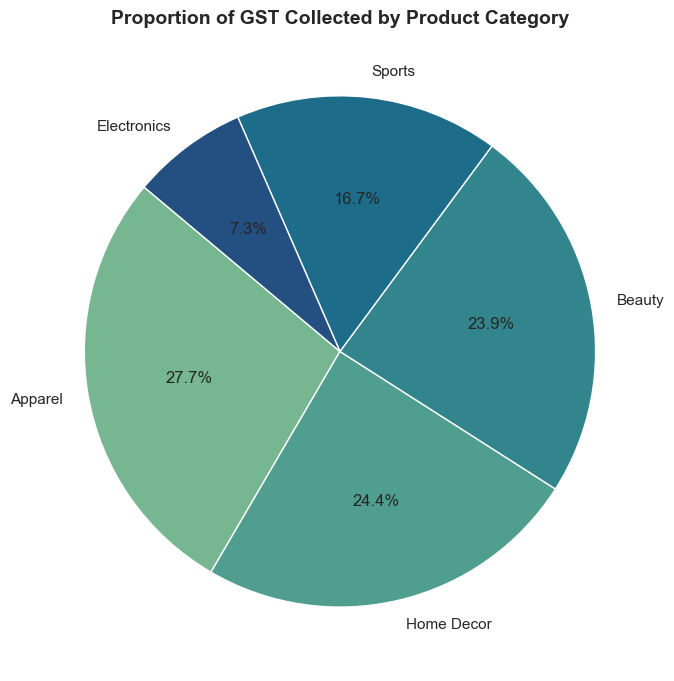

In [1]:
#1.What is the total GST collected per product category?

import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---  Connect to MySQL Database ---
conn = mysql.connector.connect(
    host='localhost',         
    user='root',              
    password='Janani@1997',
    database='DB'   
)

# ---  Call Stored Procedure ---
query = "CALL GetTotalGSTByCategory();"
df_gst = pd.read_sql(query, conn)

# ---  Display the Results ---
print("Total GST Collected by Product Category:")
print(df_gst)

# ---  Visualization 1: Horizontal Bar Chart ---
sns.set(style="whitegrid", palette="crest")

plt.figure(figsize=(10,6))
sns.barplot(data=df_gst, 
            y='Product_Category', 
            x='Total_GST', 
            hue='Product_Category', 
            dodge=False)
plt.title("Total GST Collected by Product Category", fontsize=16, weight='bold')
plt.xlabel("Total GST Collected (₹)", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

# ---  Visualization 2: Pie Chart (Share of GST by Category) ---
plt.figure(figsize=(7,7))
plt.pie(df_gst['Total_GST'], 
        labels=df_gst['Product_Category'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette("crest", len(df_gst)))
plt.title("Proportion of GST Collected by Product Category", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# ---  Close Connection ---
conn.close()


Average GST Cost by Product Category:
  Product_Category  Avg_GST_Cost
0          Apparel    280.144807
1           Beauty    264.713668
2      Electronics     76.380062
3       Home Decor    264.158670
4           Sports    182.189807


C:\Users\janan\AppData\Local\Temp\ipykernel_21224\1840020281.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg_gst = pd.read_sql(query, conn)


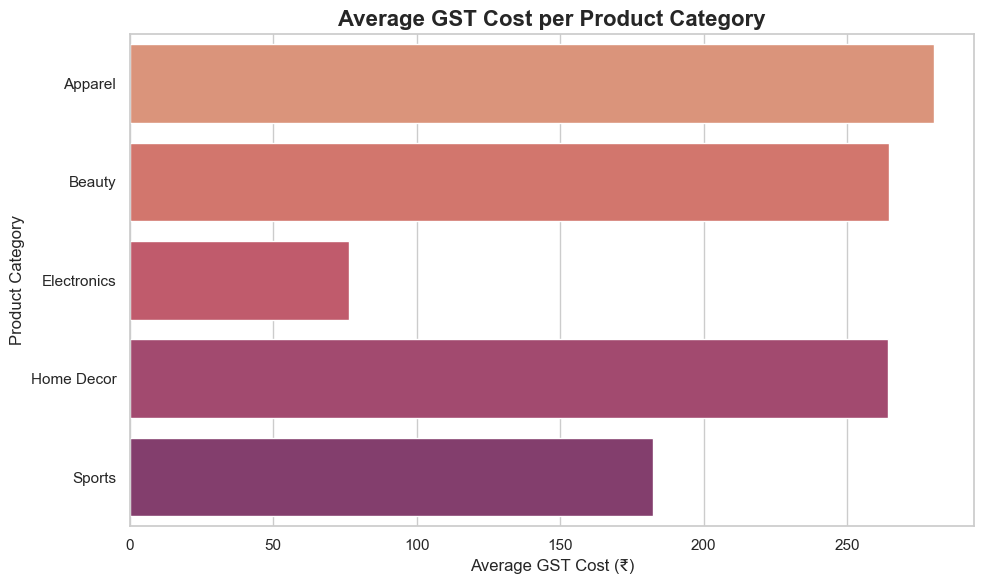

In [3]:
#2.How much does GST contribute to overall price increase per category?

# ---  Connect to MySQL Database ---
conn = mysql.connector.connect(
    host='localhost',         
    user='root',              
    password='Janani@1997', 
    database='DB'   
)

# ---  Call Stored Procedure ---
query = "CALL GetAvgGSTCostByCategory();"
df_avg_gst = pd.read_sql(query, conn)

# ---  Display the Data ---
print("Average GST Cost by Product Category:")
print(df_avg_gst)

# ---  Visualization 1: Bar Chart (Average GST Cost per Category) ---
sns.set(style="whitegrid", palette="flare")

plt.figure(figsize=(10,6))
sns.barplot(data=df_avg_gst, 
            x='Avg_GST_Cost', 
            y='Product_Category', 
            hue='Product_Category', 
            dodge=False)

plt.title("Average GST Cost per Product Category", fontsize=16, weight='bold')
plt.xlabel("Average GST Cost (₹)", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

# --- Close the Connection ---
conn.close()


C:\Users\janan\AppData\Local\Temp\ipykernel_21224\375736431.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_gst_revenue = pd.read_sql(query, conn)


Revenue by Product Category and GST Rate:
  Product_Category   GST     Revenue
0          Apparel  18.0  1669523.24
1           Beauty  18.0  1441043.04
2       Home Decor  18.0  1469350.09
3           Sports  12.0  1508419.32
4      Electronics   5.0  1594347.87


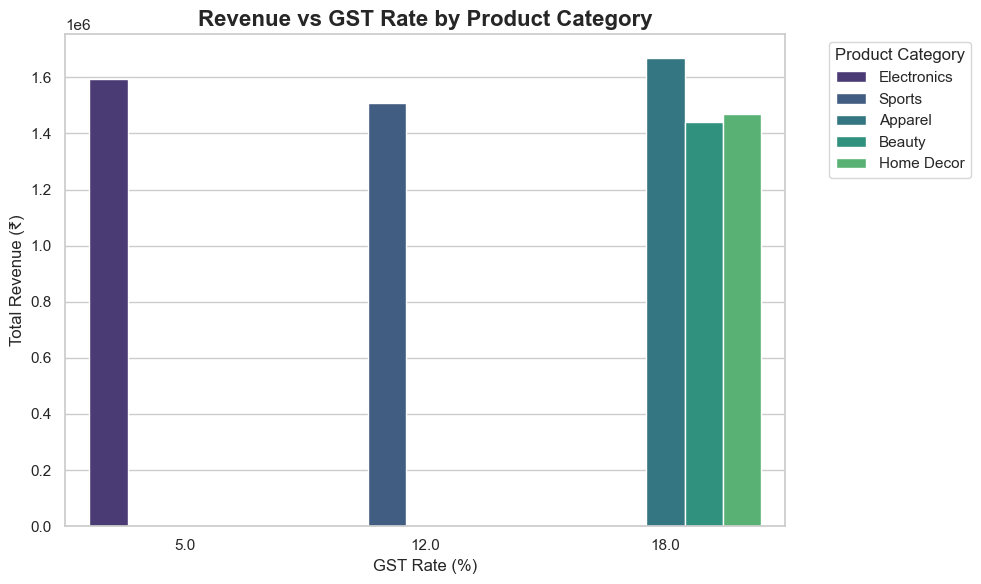

In [6]:
# 3.Are high-GST categories still performing better in sales?

# ---  Connect to MySQL Database ---
conn = mysql.connector.connect(
    host='localhost',         
    user='root',              
    password='Janani@1997', 
    database='DB'   
)

# ---  Call Stored Procedure ---
query = "CALL GetRevenueByCategoryAndGST();"
df_gst_revenue = pd.read_sql(query, conn)

# ---  Display the Results ---
print("Revenue by Product Category and GST Rate:")
print(df_gst_revenue)

# ---  Visualization 1: Bar Chart (Revenue by GST & Category) ---
sns.set(style="whitegrid", palette="viridis")

plt.figure(figsize=(10,6))
sns.barplot(data=df_gst_revenue,
            x='GST',
            y='Revenue',
            hue='Product_Category')

plt.title("Revenue vs GST Rate by Product Category", fontsize=16, weight='bold')
plt.xlabel("GST Rate (%)", fontsize=12)
plt.ylabel("Total Revenue (₹)", fontsize=12)
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ---  Close Connection ---
conn.close()
